In [43]:
import tensorflow as tf
from tensorflow import keras

In [44]:
mnist_dataset = tf.keras.datasets.mnist

In [45]:
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [46]:
len(x_train)

60000

In [47]:
x_train.shape

(60000, 28, 28)

In [48]:
import matplotlib.pyplot as plt

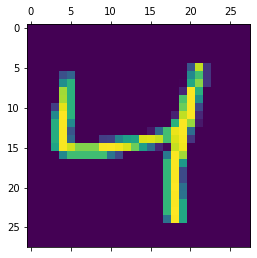

In [49]:
plt.matshow(x_train[2])

In [50]:
x_train = x_train/255
x_test = x_test/255

In [51]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [52]:
model = keras.Sequential([ # he model starts with a Flatten layer to prepare the input.
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(optimizer='sgd', # stochastic gradient descent
             loss='sparse_categorical_crossentropy', # Use this crossentropy loss function when there are 
              #two or more label classes. We expect labels to be provided as integers, mutually exclusive events
             metrics=['accuracy']) # parameter is accuracy

In [55]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6386 - accuracy: 0.8387 - val_loss: 0.3537 - val_accuracy: 0.9058
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3331 - accuracy: 0.9059 - val_loss: 0.2898 - val_accuracy: 0.9207
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2853 - accuracy: 0.9192 - val_loss: 0.2599 - val_accuracy: 0.9280
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2557 - accuracy: 0.9279 - val_loss: 0.2366 - val_accuracy: 0.9348
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2339 - accuracy: 0.9342 - val_loss: 0.2203 - val_accuracy: 0.9378
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2160 - accuracy: 0.9397 - val_loss: 0.2044 - val_accuracy: 0.9427
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2010 - accuracy: 0.9442 - val_loss: 0.1920 - val_accuracy:

In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1649 - accuracy: 0.9530
Loss=0.165
Accuracy=0.953


In [57]:
import random

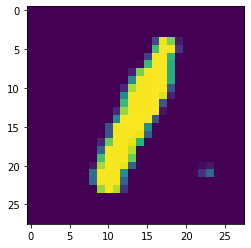

In [58]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [59]:
import numpy as np
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 0s 1ms/step
Handwritten number in the image is= 1


In [60]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Training Accuracy

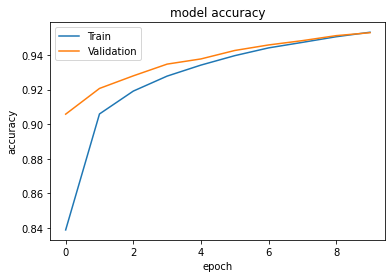

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Training Loss

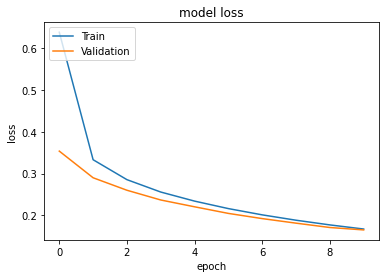

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()